## ToMe Visualization
We provide some visualization functions to visualize the effect of ToMe like in our paper.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/ViT-pytorch

/content/drive/MyDrive/ViT-pytorch


In [2]:
!pip install -q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00


In [5]:
import timm
import tome
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image

In [6]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "deit_base_patch16_224.fb_in1k"
model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
tome.patch.timm(model, trace_source=True)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [7]:
input_size = model.default_cfg["input_size"][1]

# Make sure the transform is correct for your model!
transform_list = [
    transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(input_size)
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(model.default_cfg["mean"], model.default_cfg["std"]),
])

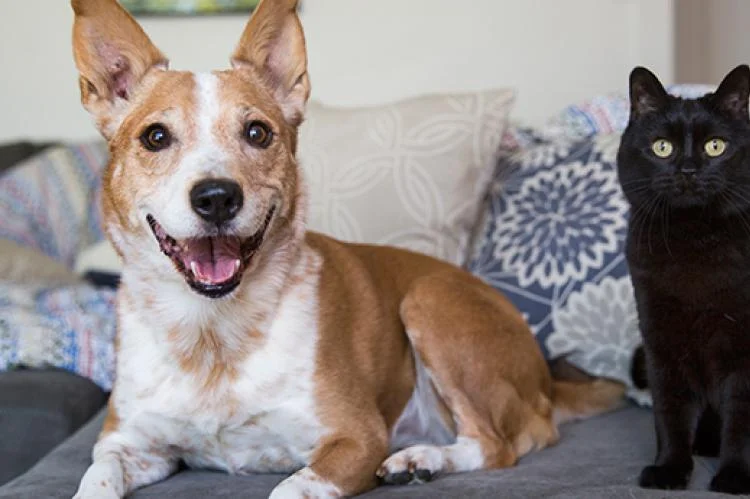

In [9]:
img = Image.open("/content/drive/MyDrive/ViT-pytorch/img/Cat-Dog-Alice-Ruby-9655sak_1.webp")
img_vis = transform_vis(img)
img_norm = transform_norm(img)

img

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

101 tokens at the end


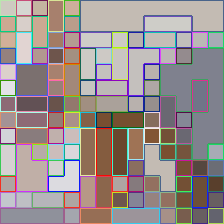

In [12]:
model.r = 8
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)

## Visualize intermediate results
Setting `r` to be a list can let us control where we stop merging.

133 tokens at the end


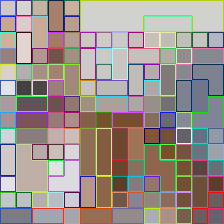

In [13]:
model.r = [8] * 8  # 8 / 24 layers
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)

117 tokens at the end


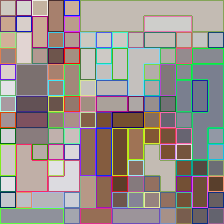

In [16]:
model.r = [8] * 10  # 16 / 24 layers
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)

101 tokens at the end


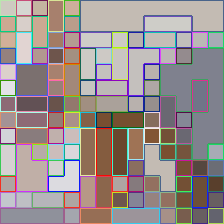

In [17]:
model.r = [8] * 12  # 22 / 24 layers
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)